# Анализ бизнес показателей

### Загрузите данные и подготовьте их к анализу

## Важные сведения о датасетах

### Тех. задание
* Загрузить данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
* Выполнить предобработку.
* Задайтеь функции для расчёта и анализа LTV, ROI, удержания и конверсии.
* Провести исследовательский анализ данных, сформулировать выводы.
* Посчитать общую сумму расходов на маркетинг.
* Выяснить, как траты распределены по рекламным источникам.
* Построить визуализацию динамики изменения расходов во времени по каждому источнику, сформулировать выводы.
* Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI. 
* Проверить конверсию пользователей и динамику её изменения, удержания пользователей, построить и изучить графики конверсии и удержания.
* Проанализировать окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, и графики динанамики LTV, CAC и ROI.
* Проанализировать окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, и графики динамики LTV, CAC и ROI.
* Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, и графики динамики LTV, CAC и ROI.
* Сформировать вывод.
* Сформировать развернутый вывод о причинах неэффективности привлечения пользователей, сформулировать рекомендации для отдела маркетинга.

### Структура visits_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

### Структура orders_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

### Структура costs_info_short.csv:
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Читаем файлы в переменные
visits = pd.read_csv()
orders = pd.read_csv()
costs = pd.read_csv()

In [3]:
#Открываем переменную с визитами
pd.set_option('display.max_columns', None)
visits.info()
display('visits', visits.head(20));

#Открываем переменную с заказами
pd.set_option('display.max_columns', None)
orders.info()
display('orders', orders.head(20));

#Открываем переменную с расходами
pd.set_option('display.max_columns', None)
costs.info()
display('costs', costs.head(20));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


'visits'

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


'orders'

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


'costs'

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<div style="border:solid green 2px; padding: 20px">
Ну с виду таблицы выглядят прилично, лишь надо дату из строк привести к datetime, привести названия столбцов к змеинному регистру, и на всякий случай проверить таблицы на пропуски значений.

In [4]:
#Приводим названия столбцов к нижнему регистру
visits.columns = map(str.lower, visits.columns)
orders.columns = map(str.lower, orders.columns)
costs.columns = map(str.lower, costs.columns)

#Переименовываем столбцы в правильный формат названий
visits.rename(columns = {'user id': 'user_id', 'session start':'session_start', 'session end':'session_end'}, inplace = True)
orders.rename(columns = {'user id':'user_id', 'event dt': 'event_dt'}, inplace = True)

#Переводим даты в нужный для работы формат
visits['session_start'] = pd.to_datetime(visits['session_start'], format='%Y.%m.%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'], format='%Y.%m.%d %H:%M:%S')
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format='%Y.%m.%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#Снова запускаем таблицы
pd.set_option('display.max_columns', None)
visits.info()
display('visits', visits.head(20));

pd.set_option('display.max_columns', None)
orders.info()
display('orders', orders.head(20));

pd.set_option('display.max_columns', None)
costs.info()
display('costs', costs.head(20));


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


'visits'

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


'orders'

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


'costs'

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [5]:
#Пропуски у визитов
pd.DataFrame(round(visits.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
region,0.000000
device,0.000000
channel,0.000000
session_start,0.000000
session_end,0.000000


In [6]:
#Пропуски у заказов
pd.DataFrame(round(orders.isna().mean()*100,1)).style.background_gradient('coolwarm')


,0
user_id,0.000000
event_dt,0.000000
revenue,0.000000


In [7]:
#Пропуски у расходов
pd.DataFrame(round(costs.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
dt,0.000000
channel,0.000000
costs,0.000000


In [8]:
#Проверим дубликаты у визитов
print(visits.duplicated().sum())

0


In [9]:
#Проверим дубликаты у заказов
print(orders.duplicated().sum())

0


In [10]:
#Проверим дубликаты у расходов
print(costs.duplicated().sum())

0


<div style="border:solid green 2px; padding: 20px">
    Пропусков не обнаружено, явных дубликатов нет, таблицы приведены к единому регистру, столбцы с датами приведены к необходимому для работы типу данных. Все круто, можно идти дальше :)

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

<div style="border:solid green 2px; padding: 20px">
    <h1> Функции для вычисления метрик.

<div style="border:solid green 2px; padding: 20px">
Создание профилей пользователей.

In [11]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<div style="border:solid green 2px; padding: 20px">
Подсчет Retention Rate.

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<div style="border:solid green 2px; padding: 20px">
Расчет конверсии.

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<div style="border:solid green 2px; padding: 20px">
Подсчет LTV.

In [14]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<div style="border:solid green 2px; padding: 20px"> 
    <h1> Теперь функции для построения графиков. 

<div style="border:solid green 2px; padding: 20px"> 
    Сглаживание данных.

In [15]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

<div style="border:solid green 2px; padding: 20px">
Визуализация удержания.

In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

<div style="border:solid green 2px; padding: 20px">
Визуализация конверсии.

In [17]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [		
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<div style="border:solid green 2px; padding: 20px">
    Визуализация лайфтайма и ROI

In [18]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

<div style="border:solid green 2px; padding: 20px">
<h4>Получаем профили пользователей, определяем минимальную и максимальную даты привлечения.

In [19]:
#Выводим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [20]:
#Минимальная и максимальная дата привлечения

observation_date = profiles['dt'].max()  #Момент анализа
analysis_horizon = 14  #Горизонт анализа

#Минимальная дата
min_analysis_date = profiles['dt'].min()

#Максимальная дата
max_analysis_date =  observation_date - timedelta(days=analysis_horizon - 1) 

print(f'Минимальная дата привлечения: {min_analysis_date}')
print(f'Максимальная дата привлечения: {max_analysis_date}')

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-14


<div style="border:solid green 2px; padding: 20px">
   <h4> Переходим к выявлению стран пользователей, и определению соотношения платящих пользователей к неплатящим.

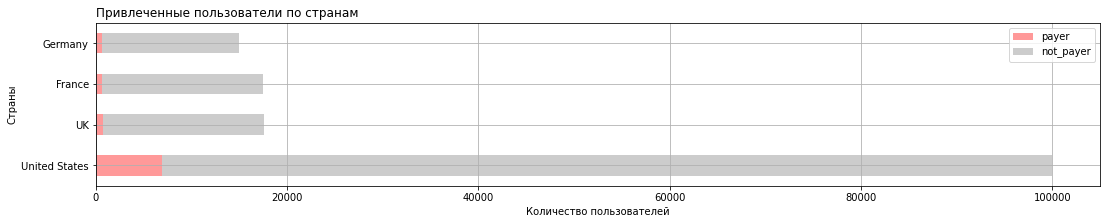

payer,not_payer,payer,payer_share
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


In [21]:
#Строим визуализацию регионов, а так же таблицу для наглядности
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
fig, ax = plt.subplots(figsize=(18, 3))
region[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4, color=['red', 'gray'], grid=True)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Страны')
ax.set_title('Привлеченные пользователи по странам',loc='left')
plt.show()

region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2) #Процентное соотношение
region

<div style="border:solid green 2px; padding: 20px">
    Подавляющее большинство пользователей из США, и логично что трафик платящих в связи с этим так же в первых рядах рейтинга. Франция и Британия практически идентичны в показателях, а Германия имеет низший показатель трафика среди неплатящих пользователей, однако, платящих в процентном соотношении больше чем у Франции и Британии! Можно предположить что для Германии настроен более целевой таргет, но пока рано делать какие-либо выводы.

<div style="border:solid green 2px; padding: 20px">
<h4>Устройства пользования клиентов, предпочтения к устройствам.

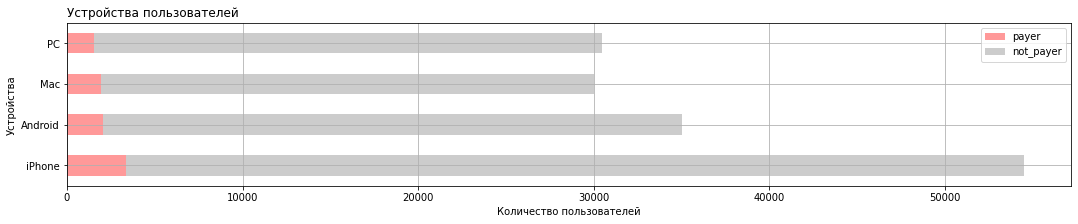

payer,not_payer,payer,payer_share
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
Mac,28130,1912,6.36
PC,28918,1537,5.05


In [22]:
#Таблица и график устройств
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
fig, ax = plt.subplots(figsize=(18, 3))
device[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4, color=['red', 'gray'], grid=True)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Устройства')
ax.set_title('Устройства пользователей',loc='left')
plt.show()

device['payer_share'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)
device

<div style="border:solid green 2px; padding: 20px">
Аналогичным образом визуализировав устройста пользователей, наблюдается приоритетным Айфон, как среди платящих так и неплатящих клиентов. На втором месте устройства на Андройде. Пользователи ПК и Макбука имеют низкий показатель, может быть из-за отсутствия такой мобильности относительно смартфонов, а быть может из-за недостатков в вёрстке приложений.

<div style="border:solid green 2px; padding: 20px">
    <h4> рекламные источники привлечения. Определяем каналы из которых приходят пользователи.

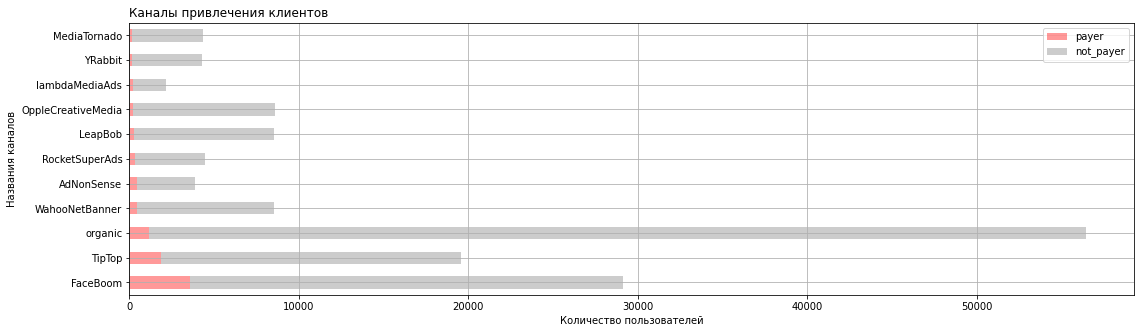

payer,not_payer,payer,payer_share
channel,,,
FaceBoom,25587,3557,12.20
TipTop,17683,1878,9.60
organic,55279,1160,2.06
WahooNetBanner,8100,453,5.30
AdNonSense,3440,440,11.34
RocketSuperAds,4096,352,7.91
LeapBob,8291,262,3.06
OppleCreativeMedia,8372,233,2.71
lambdaMediaAds,1924,225,10.47


In [23]:
#Канал привлечения
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
fig, ax = plt.subplots(figsize=(18, 5))
channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4, color=['red', 'gray'], grid=True)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Названия каналов')
ax.set_title('Каналы привлечения клиентов',loc='left')
plt.show()

channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)
channel

<div style="border:solid green 2px; padding: 20px">
    По графику наблюдается  основной прирост клиентов органического трафика. Однако как известно, органический трафик практически всегда уступает показателями платящей аудитории клиентов платным каналам привлечения. Среди платных способов привлечения лидерами являются FaceBoom и TipTop. При меньшем количестве общего трафика, их показатель платящих пользователей выше чем у органического трафика. Хочется сделать ставку на то, что нужно концентрировать бюджет на лидерах списка, и отсеять малоэффективные площадки для увеличения полезного трафика и экономии средств, но пока не буду :)
    
Кстати, такие каналы как ADNonSense и LambdaMediaAds при всем своем низком показателе имеют выделяющееся на фоне остальных соотношение платящих пользователей к неплатящим. Тут можно сделать предположение, что если увеличить бюджет на этих каналах - они раскроют потенциал в полной мере и принесут прибыль компании....   

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

<div style="border:solid green 2px; padding: 20px">
<h4>Считаем общую сумму расходов на маркетинг, и выводим сводную таблицу по тратам на источники.

In [24]:
#Выводим на экран таблицу с затратами по убыванию, и общую сумму
display(costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False))
print(f'Общая сумма затрат на рекламу: {costs.costs.sum().round()}')

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Общая сумма затрат на рекламу: 105497.0


<div style="border:solid green 2px; padding: 20px">
    Логично, что основные расходы бюджета идут на ведущие площадки, а именно TipTop и FaceBoom

<div style="border:solid green 2px; padding: 20px">
<h4>Строим визуализацию динамики изменения расходов во времени по каждому источнику.

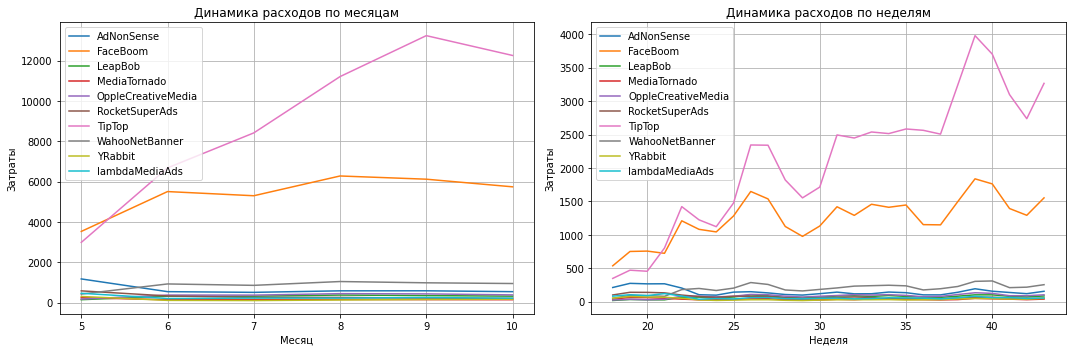

In [25]:
#Сводная таблица месяца и недели
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

plt.figure(figsize = (15,5))
#График по месяцам
ax1 = plt.subplot(1,2,1)
costs_pivot = costs.pivot_table(index='dt_month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.title('Динамика расходов по месяцам')

#График по неделям
ax2 = plt.subplot(1,2,2)
costs_pivot = costs.pivot_table(index='dt_week', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.title('Динамика расходов по неделям')

plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 20px">
    Закономерно наблюдаются большие вложения в FaceBoom и TipTop, по динамике на недельном графике видно колебания расходов, что можно объяснить разным приростом пользователей в определенные дни, на месячном графике ситуация более плавная, на сентябрь виднеется пиковое значение затрат для TipTop, и на октябрь спад. По остальным рекламным площадкам все стабильно.

<div style="border:solid green 2px; padding: 20px">
<h4>Расчитаем средний CAC из каждого источника.

In [26]:
#Делаем таблицу среднего CAC одного пользователя по всем источникам
cac_mean = profiles.groupby('channel')['acquisition_cost'].agg('mean').sort_values(ascending = False)
cac_mean

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

<div style="border:solid green 2px; padding: 20px">
Самыми дорогими являются TipTop = 2.8, Faceboom = 1.1, AdNonSense = 1. Пожалуй, стоит в последующих расчетах на это концентрировать внимание.

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

<div style="border:solid green 2px; padding: 20px">
<h4>Окупаемость рекламы на графиках LTV и ROI, и графики динамики LTV, CAC и ROI.

<div style="border:solid green 2px; padding: 20px">
    Исходя из поставленной задачи, пользователи должны окупаться не позднее чем через две недели после привлечения, будем задавать параметры и строить графики. Исключим органический трафик т.к. учет его в построении графиков будет искажать результы, зададим горизонт анализа, и момент анализа 1 ноября 2019 года.

In [27]:
observation_date = datetime(2019, 11, 1).date() #Момент анализа
horizon_days = 14 #Горизонт анализа
ad_profiles = profiles.query('channel != "organic"') #Исключаем органику

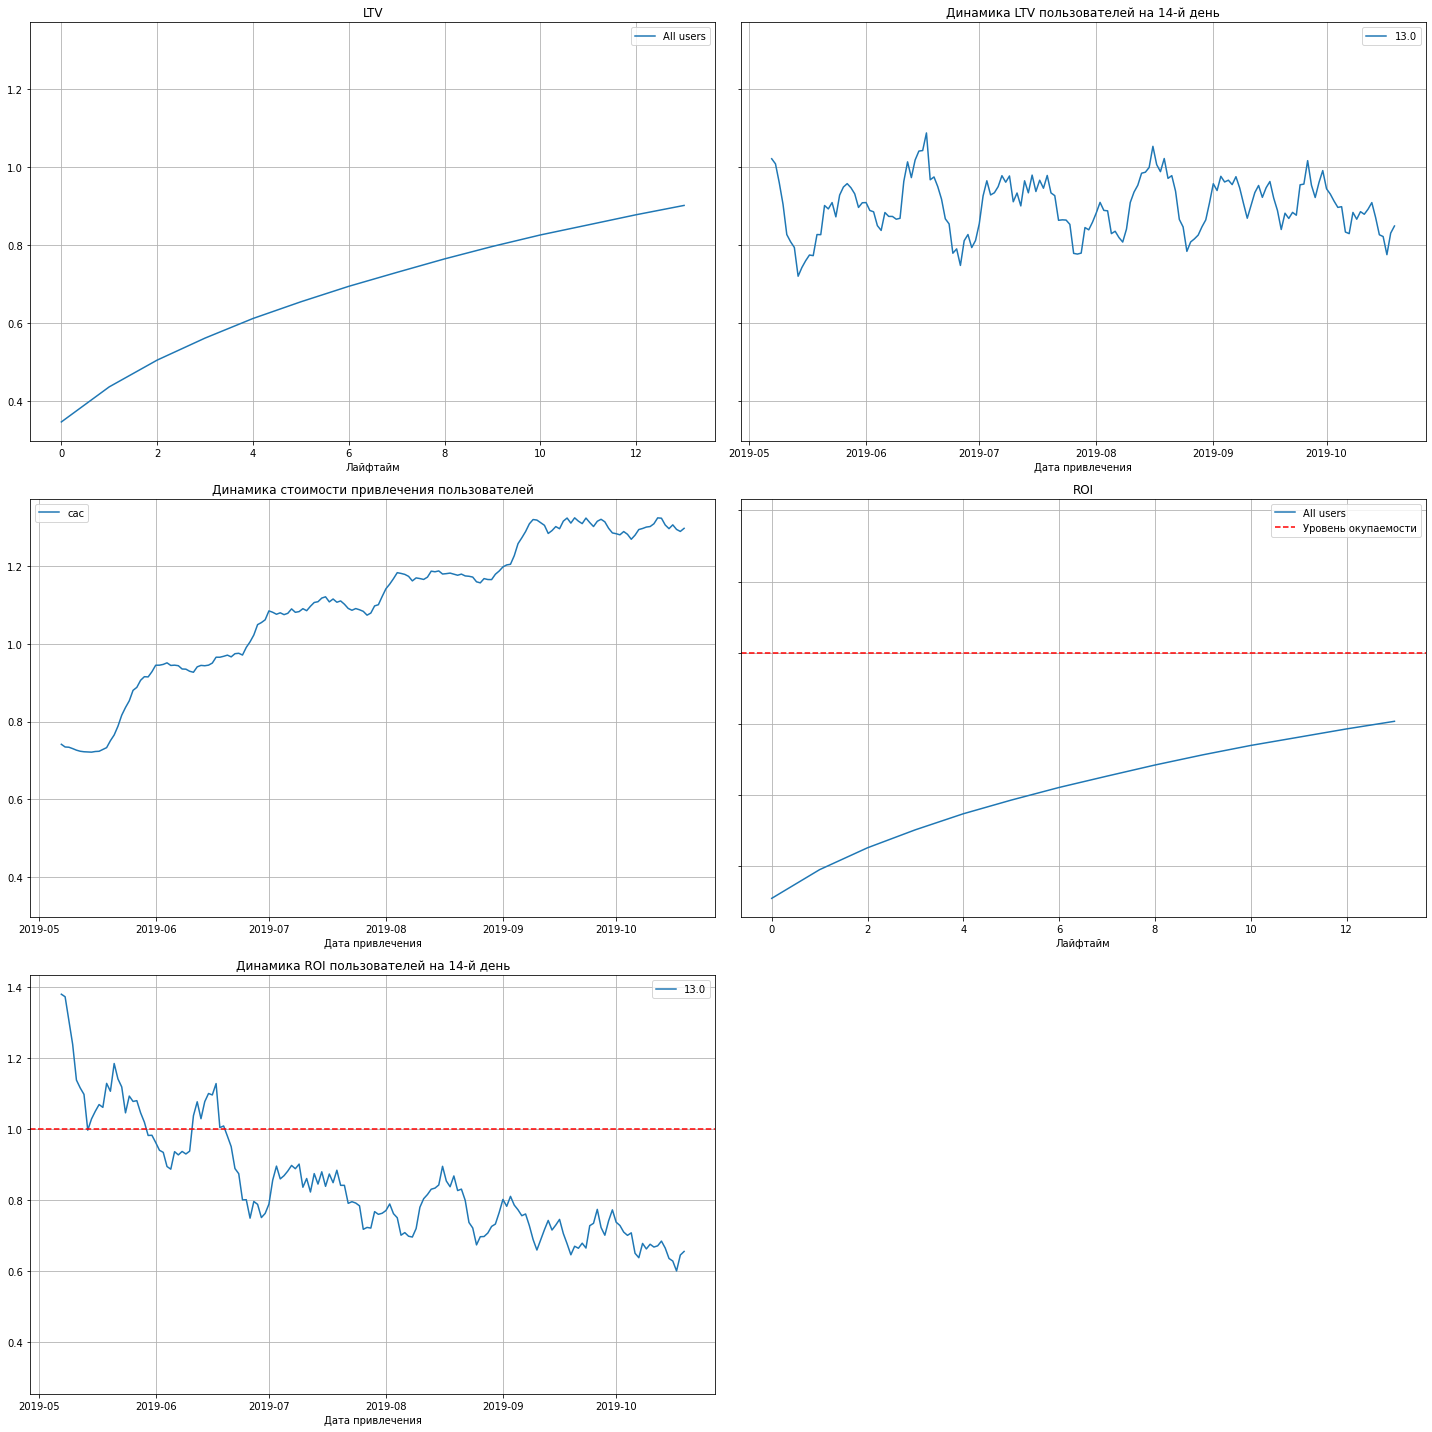

In [28]:
#LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days
)
#Построение графиков
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid green 2px; padding: 20px">
    Графики показывают в целом не радужную картину. К лайфтайму вопросов нет, он в норме, его динамика стабильна, средняя стоимость привлечения (CAC) повышается, что разумеется говорит о увеличении расходов, ROI-показатель рентабельности инвестиций, не окупается в поставленные временные рамки 14 дней, а значит компания даёт рекламу себе в убыток. По динамике на 14й день показатель ROI превысил отметку окупаемости на 4 пункта, но тут же стремится вниз. Наблюдается закономерность в росте CAC и одновременном падении ROI, ведь чем выше стоимость привлечения - тем сложнее выйти в прибыль.

<div style="border:solid green 2px; padding: 20px">
<h4>Конверсия пользователей и динамика её изменения. Конверсия удержания пользователей.

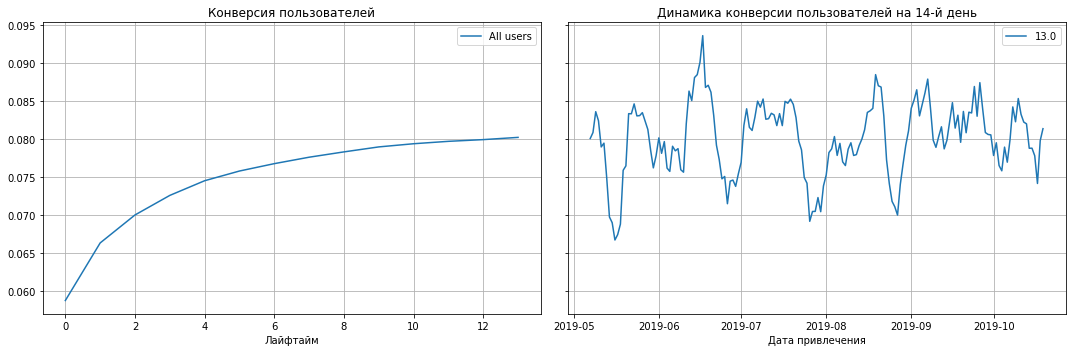

In [29]:
#Получим конверсию и динамику конверсии вызвав get_conversion и plt_conversion заготовленные раннее
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<div style="border:solid green 2px; padding: 20px">
    Конверсия имеет стабильную, положительную динамику

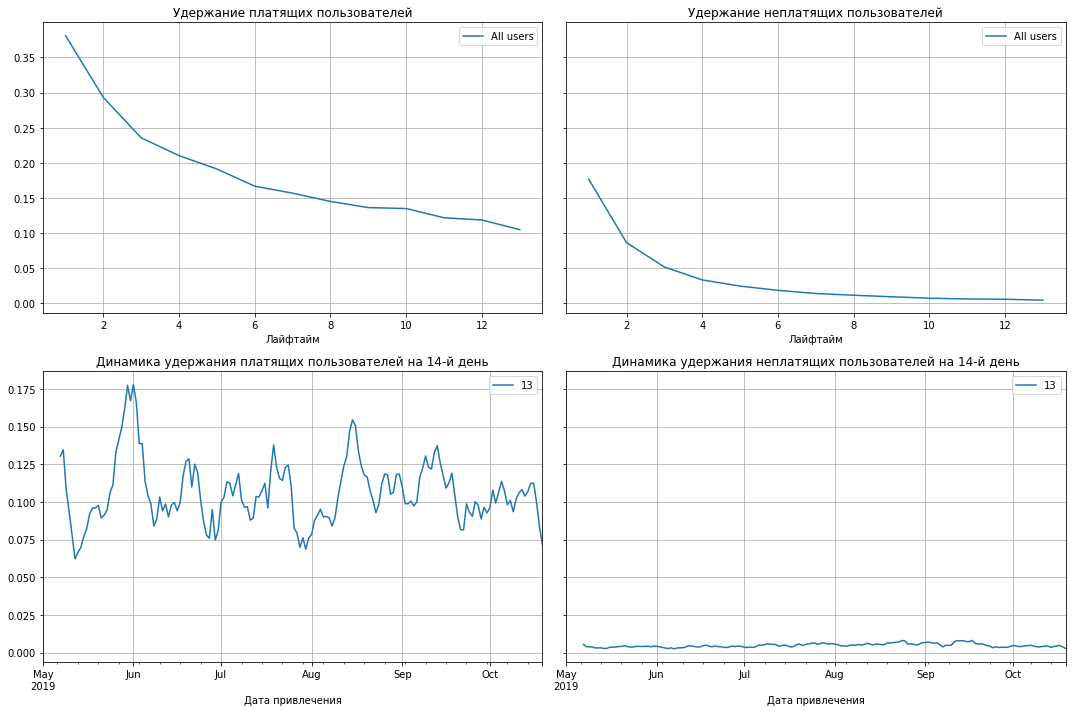

In [30]:
#Проверим удержание, аналогично вызвав функции

retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div style="border:solid green 2px; padding: 20px">
    Удержание пользователей закономерно снижается, около 10%  платящих пользователей остаются на 14 день, неплатящие отваливаются к 12ому дню.

<div style="border:solid green 2px; padding: 20px">
<h4>Окупаемость рекламы с разбивкой по устройствам.

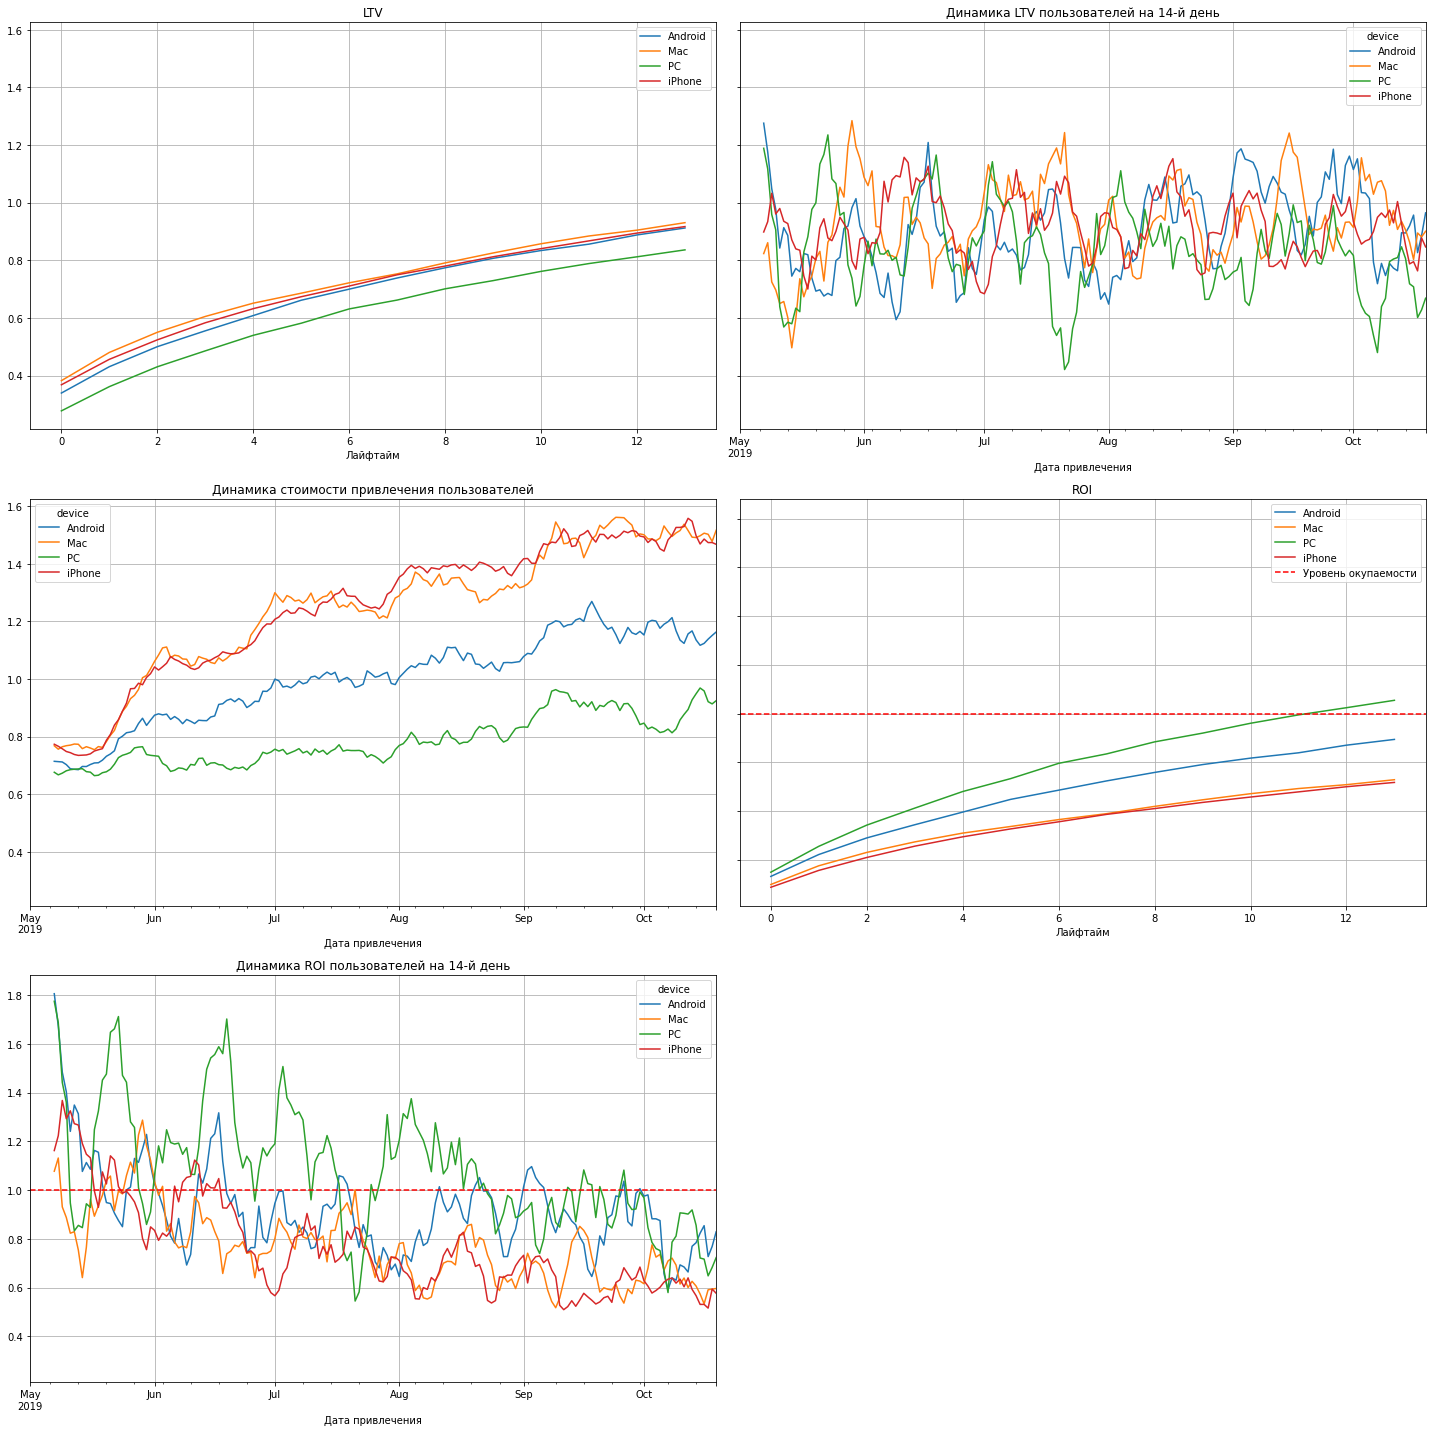

In [31]:
dimensions = ['device'] #Добавляем столбец устройств
# Считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
#Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid green 2px; padding: 20px">
    Все устройства кроме PC не окупаются... Лайфтайм стабилен, к нему вопросов нет. Динамика стоимости пользователей PC самая низкая, это положительно влияет на результат окупаемости данной платформы, а так же, думаю здесь играет роль общее процентное соотношение количества платящих пользователей к неплатящим. Моё предположение о недоработке ПО/отсутсвии мобильности на РС отпадает, дело не в этом.

<div style="border:solid green 2px; padding: 20px">
<h4>Окупаемость рекламы с разбивкой по странам.

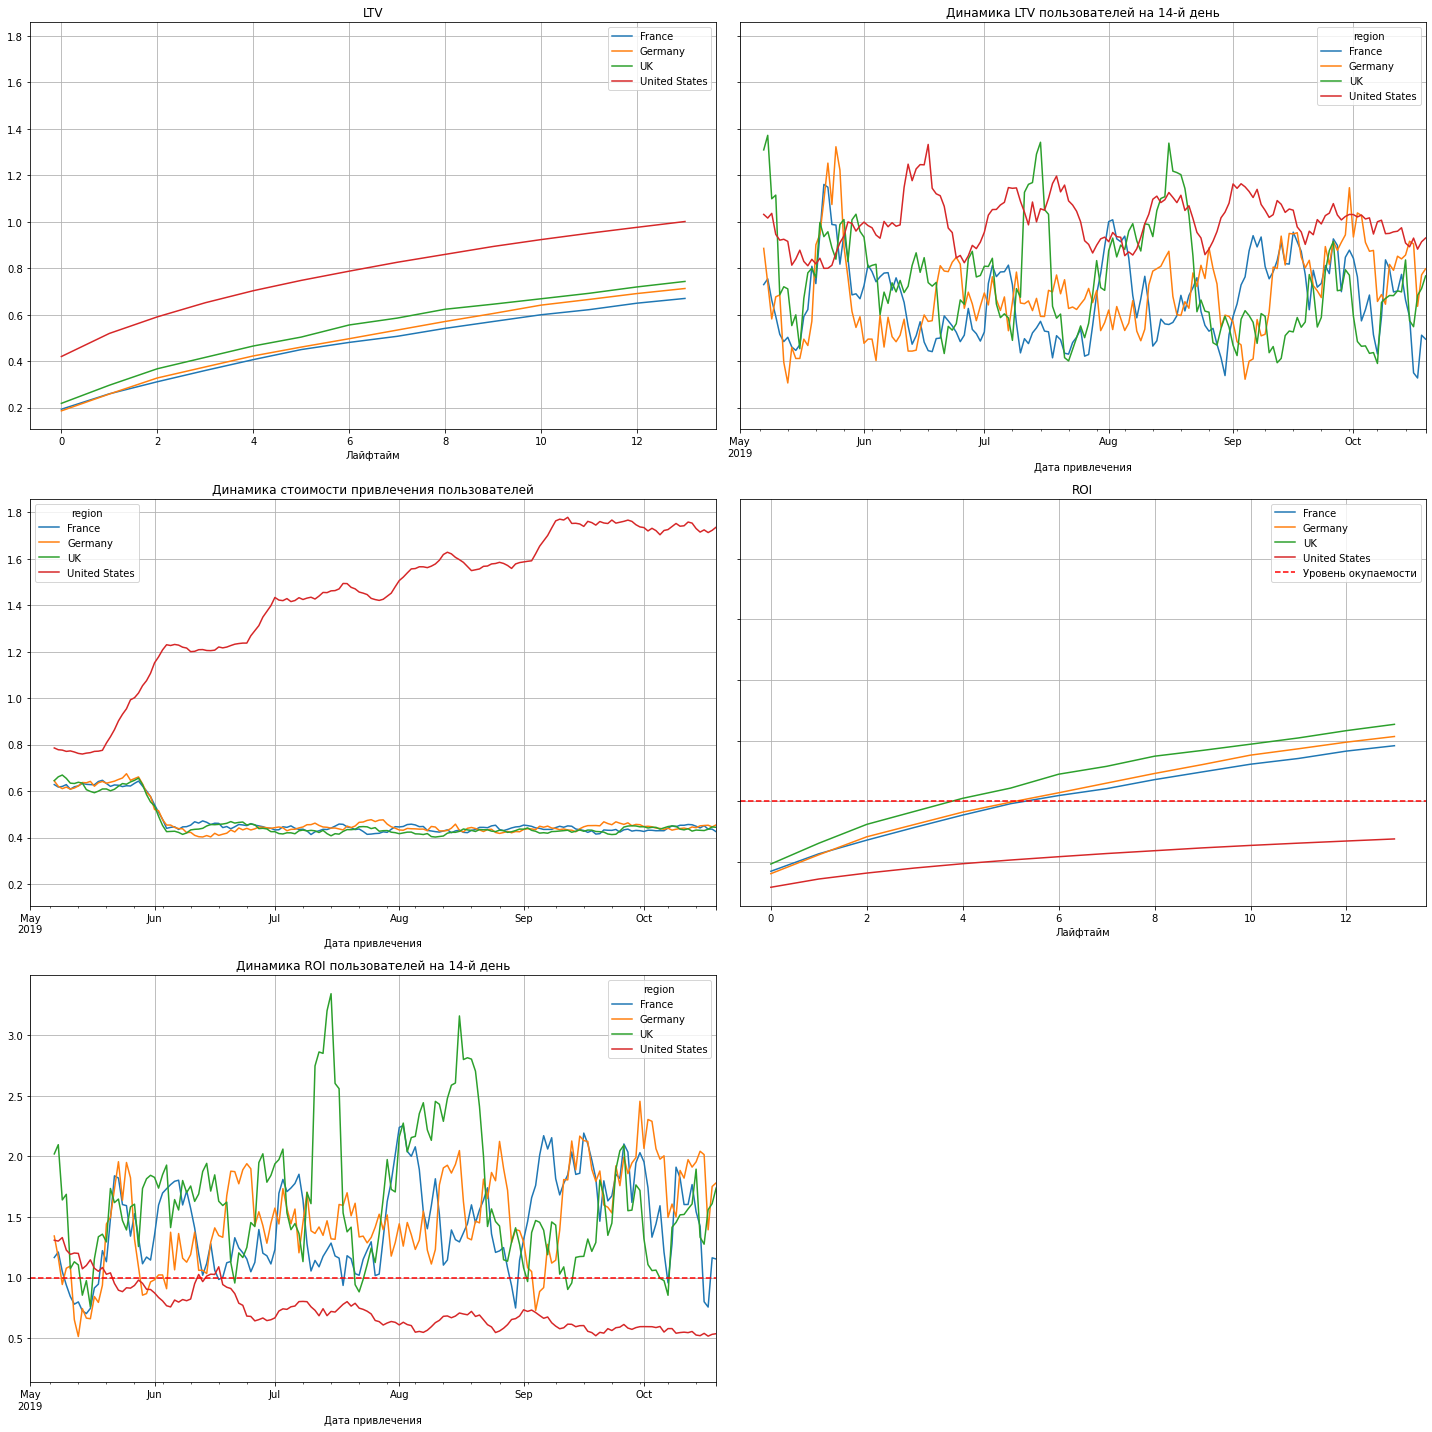

In [32]:
dimensions = ['region'] #Заменим устройства на страны.
#Считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
#Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid green 2px; padding: 20px">
    Видно что не окупается в период двух недель только США. Так же видно, что CAC у Соединенных Штатов выше всех, логично подумать что таргет TipTop и FaceBoom направлен на аудиторию Штатов, потому что наблюдается прямая связь в стоимости затрат между рекламой на единицу пользователя, и потоком бюджета в самые дорогостоящие площадки.

In [33]:
#Выведем сводную таблицу с каналами, регионами куда направлен трафик, и сортировкой значений вложений бюджета по убыванию
pd.pivot_table(profiles,
              index = ['channel', 'region'],
              aggfunc = 'sum').sort_values(by=['acquisition_cost'] , ascending = False)

acquisition_cost  payer            user_id
channel            region                                                   
TipTop             United States      54751.300000   1878   9708289783241686
FaceBoom           United States      32445.600000   3557  14606558389460580
RocketSuperAds     United States       1833.000000    352   2231345012998483
WahooNetBanner     UK                  1808.890277    153   1505800555069881
                   France              1789.137006    152   1477713898149230
                   Germany             1552.972718    148   1272148862814362
AdNonSense         France              1376.316788    150    702798060832124
                   UK                  1305.650668    148    640549239967849
                   Germany             1229.282545    142    616132888976271
MediaTornado       United States        954.480000    156   2217083852497856
YRabbit            United States        944.220000    165   2143810696485552
OppleCreativeMedia UK                   763.180209     89   1501563683171425
                   France               747.336327     80   1499068948914854
                   Germany              640.733464     64   1289478005442312
LeapBob            UK                   639.607864    103   1539904380492977
                   France               628.045578     90   1484433705869574
lambdaMediaAds     UK                   551.173800     76    358035727338614
                   France               535.138248     82    365282995365995
LeapBob            Germany              529.946557     69   1264658745455852
lambdaMediaAds     Germany              471.287952     67    314139073655057
organic            France                 0.000000    109   3191781651262984
                   Germany                0.000000    126   2744311078362426
                   UK                     0.000000    131   3184644734150248
                   United States          0.000000    794  19043028301868244

<div style="border:solid green 2px; padding: 20px">
Столбец acquisition_cost отображает вложения бюджета на рекламу. Эта сводная таблица дополняет графики, указывая на то что в регион Соединенных Штатов направлена подавляющая часть бюджета.

<div style="border:solid green 2px; padding: 20px">
<h4>Окупаемость рекламы с разбивкой по каналам привлечения.

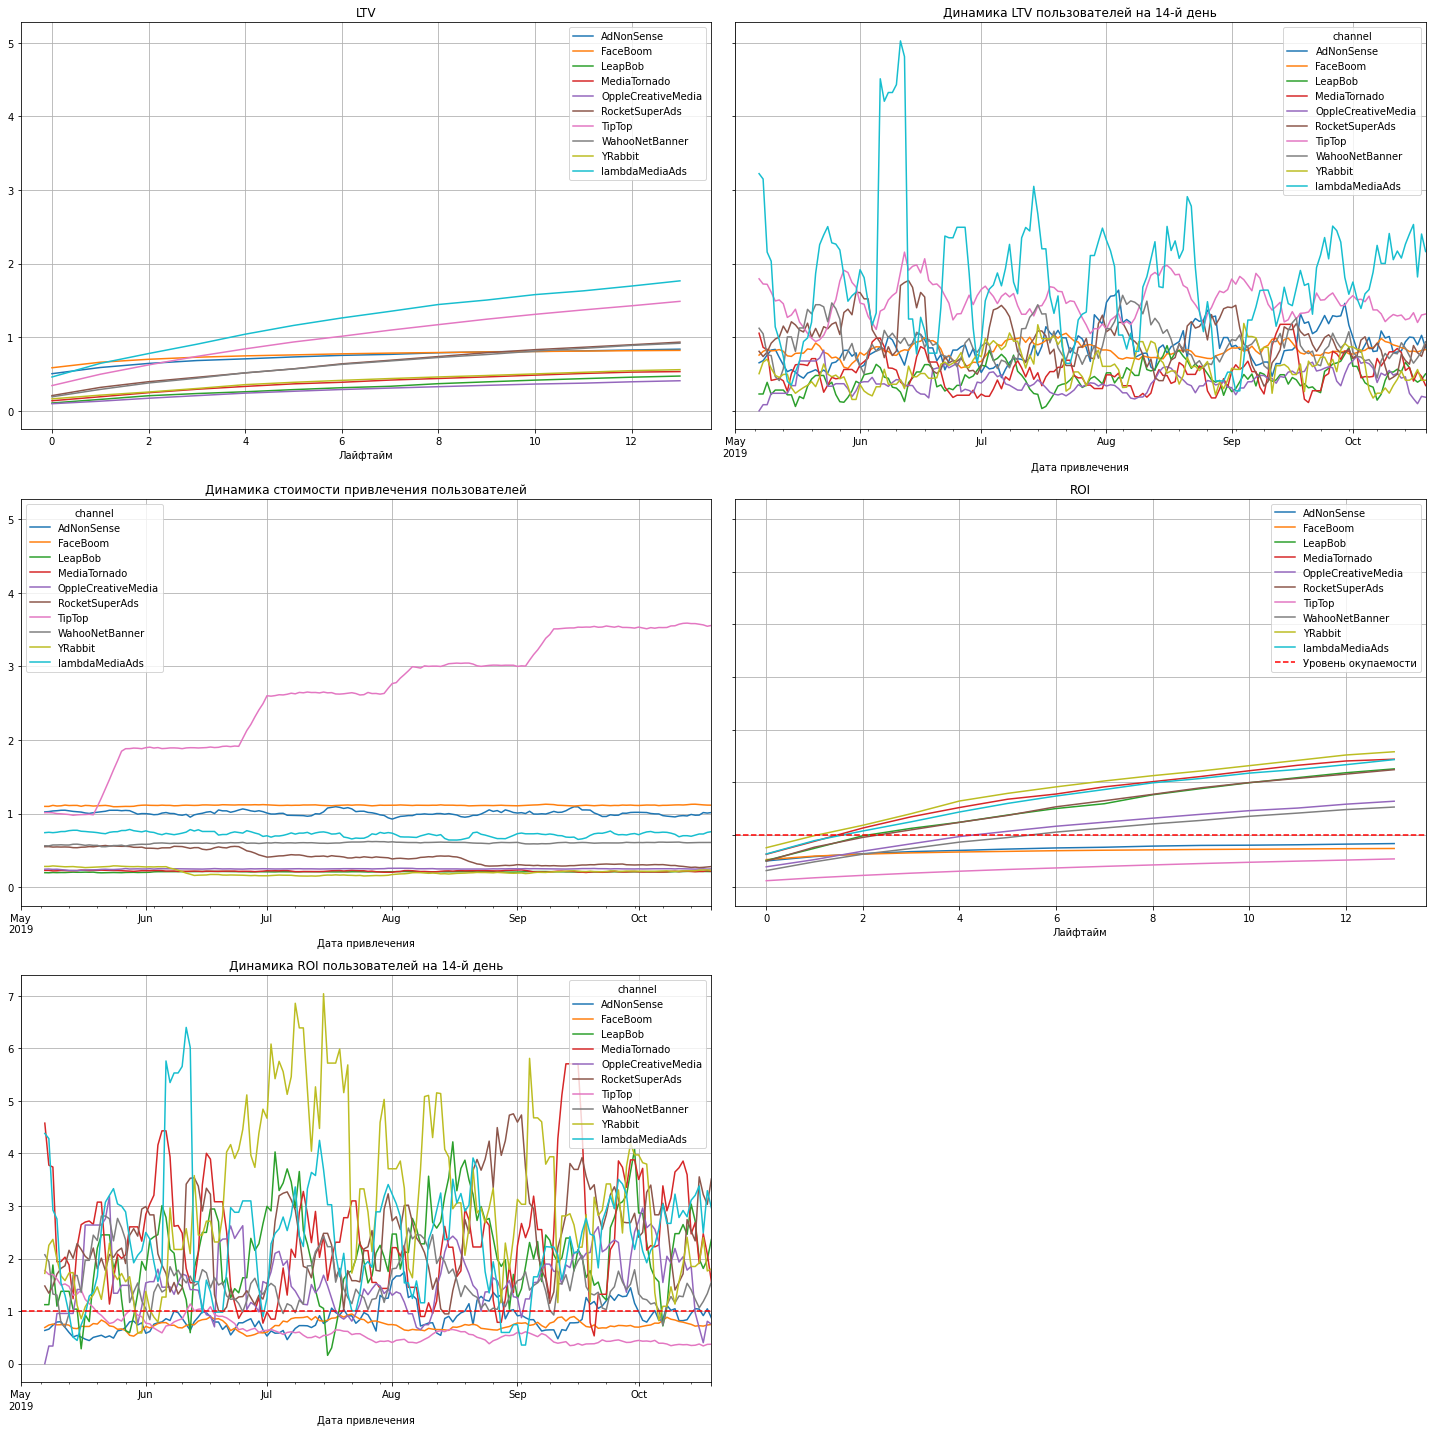

In [34]:
dimensions = ['channel'] #Подставляем рекламные площадки.
#Считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
#Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid green 2px; padding: 20px">
    Общий LTV за 14 дней ровный, с положительной динамикой. Окупились почти все площадки кроме TipTop, FaceBoom, и AdNonSense. Динамика стоимости пользователя стабильна у всех кроме TipTop, что говорит о повышении растрат бюджета на данной площадке. Раннее я обращал внимание на площадку LambdaMediaAds, которая показала хорошее процентное соотношение платящих пользователей к неплатящим (10.47% платящих), на графиках общей динамики окупаемости, и отдельной на 14й день она так же положительно себя характеризует. 
    
    Я считаю, что продвижение рекламы на таких площадках как LambdaMediaАds, YRabbit и MediaTornadо имеет хороший потенциал, т.к. метрики показывают низкую стоимость рекламы, отличную окупаемость в поставленые сроки, и достойный лайфтайм.

<div style="border:solid green 2px; padding: 20px">
 * В целом, реклама окупается за исключением трех каналов, а именно: TipTop, FaceBoom, AdNonSense. TipTop и FaceBoom имеют очень высокий CAC, а потому вкладывать средства в продвижение не имеет смысла, т.к. в такой ситуации хотя-бы выйти в ноль затруднительно, не говоря уже о прибыли.
        
*Портативные устройста на ОС Андройд и IOS являются самыми дорогостоящими в привлечении пользователей, думаю это связано с большей популярностью этих устройств у аудитории, отсюда и стоимость рекламы. В целом это негативно влияет на окупаемость рекламы в совокупности с направленным трафиком в США на и без того нерентабельных площадках TipTop и FaceBoom в этом регионе для данного продукта.

*Проблемы с окупаемостью вызваны неверной стратегией вложения бюджета в рекламные площадки и выбором региона, вероятно они были запущены без должного тестирования, в результате чего рекламная кампания не показывает удовлетворительных результатов.

### Общие выводы
- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

<h3>Мы провели комплексное исследование:</h3>
    
    

    
 - **Обработали данные**  
просмотрели исходные таблицы оценив объем работы  
проверили на наличие пропусков
проверили на наличие дубликатов


    
 - **Привели к единому стандарту**  
    Данные были приведены к соответствующим типам, названия столбцов были приведены к единому змеинному регистру.  
    

    
 - **Прописали ряд функций для выполнения последующих построений графиков и работой с ними**  
    Задали функцию для создания профилей пользователей  
    Задали функцию для подсчета удержания  
    Задали функцию для подсчета конверсии  
    Задали функцию для подсчета LTV  
    Отдельно прописали фунции для построения графиков  
    Функцию для сглаживания данных  
    Функцию для построения графиков удержания  
    Функцию для графика конверсии  
    Функцию для визуализации LTV и ROI  

    
 - **Сделали выводы на основе полученных результатов**  
     Подавляющее большинство пользователей из США, трафик платящих в связи с этим так же в первых рядах рейтинга. Франция и Британия практически идентичны в показателях, а Германия имеет низший показатель трафика среди неплатящих пользователей, однако, платящих в процентном соотношении больше чем у Франции и Британии.
     
     Аналогичным образом визуализировав устройста пользователей, выявлен приоритетным Айфон как среди платящих так и неплатящих клиентов. На втором месте устройства на Андройде. Пользователи ПК и Макбука имеют низкий показатель.
     
     В целом, реклама окупается за исключением трех каналов, а именно: TipTop, FaceBoom, AdNonSense. TipTop и FaceBoom имеют очень высокий CAC, а потому вкладывать средства в продвижение не имеет смысла, т.к. в такой ситуации превысить порог окупаемости маловероятно.
    Портативные устройста на ОС Андройд и IOS являются самыми дорогостоящими в привлечении пользователей, это связано с большей популярностью этих устройств у аудитории, отсюда и стоимость рекламы. В целом это негативно влияет на окупаемость рекламы в совокупности с направленным трафиком в США на и без того нерентабельных площадках TipTop и FaceBoom в этом регионе для данного продукта.

    Проблемы с окупаемостью вызваны неверной стратегией вложения бюджета в рекламные площадки и выбором региона, вероятно они были запущены без должного тестирования, в результате чего рекламная кампания не показывает удовлетворительных результатов.
     
     
 - **Рекомендации для отдела маркетинга**  
     Исходя из проведенного исследования, можно дать рекомендации по оптимизации рекламной кампании для выхода продукта в прибыль. Следует пересмотреть стратегию направления бюджета в рекламные площадки, обратить внимание на выбор региона, снизить расходы бюджета на рекламу портативных устройств.  
     
     Таким образом, рекомендую обратить внимание на распределение трафика по другим регионам, т.к. Германия, Франция и Британия имеют потенциал приносить прибыль. Германия среди них является приоритетной страной исходя из графика, потому что при меньшем охвате аудитории не уступает показателем платящих пользователей Франции и Британии в процентном соотношении.  
     
     Рекомендую снизить нагрузку трафика с США и тестово распределить её на Германию, Францию и Британию. Прежде всего это уменьшит растраты бюджета, и будет возможность протестировать аудиторию других регионов с целью определить фаворита. Так же стоит заотстрить внимание на канале привлечения LambdaMediaAds, она показала себя как многообещающая платформа на которую следует направить часть бюджета для получения качественного трафика.  
     
     Мобильные устройства исходя из исследования, имеются у подавляющего большинства пользователей. Вкладывать большой бюджет в данную категорию нецелесообразно, т.к. трафик и так является основным с этих устройств. Вместо этого, опять же обращу внимание на распределение трафика с региона США на другие страны, плюс развитие других потенциальных каналов продвижения. А именно: LambdaMediaAds, YRabbit, MediaTornado. Эти площадки показывают себя с лучшей стороны в соотношении стоимости рекламы на них, и показателе ROI. Каждую площадку необходимо тестировать, и при подтверждении рентабельности за определенный период увеличивать бюджет.  
     
     
   - **Дополнено** 
      В работе с каналом AdNonSense тоже следует сменить подход. Он не окупает себя, при низкой стоимости рекламы и довольно-таки хорошем лайфтайме. Исключать из списка площадок канал не стоит, т.к. мы видим качественный трафик на площадке в процентном соотношении, и при правильной стратегии она тоже может показать себя с лучшей стороны. Предлагаю так же попробовать сменить регион в тестовом режиме, более тонко настроить целевую аудиторию трафика, попробовать направить на разные платформы. Важно отследить момент получения прибыли на этом канале привлечения, и тогда рекламная кампания будет выходить в плюс.
      
      Не стоит исключать США из регионов направления трафика, необходимо лишь распределить бюджет с TipTop и FaceBoom на другие каналы привлечения. Для TipTop и FaceBoom главная задача снизить стоимость рекламы, эти каналы имеют самый большой трафик относительно остальных.
      
      А так же, имеются рекомендации по улучшению показателей конверсии и удержания. Для удержания пользователя стоит добавить мейл/смс (менее желаемо, но работает) платящим пользователям, которые не заходят в приложение больше двух дней. Текст рассылки должен содержать привлекающие аудиторию предложения/акции/информацию о изменениях/новинки, все, что способно заинтересовать пользователя (берите пример с маркетплейсов). Усилить конверсию трафика поможет оптимизация интерфейса приложения для более легкой оплаты подписки, работа над качеством контента для ЦА, отдельно собирать информацию о людях прервавших регистрацию, для отправки им на телефон напоминание что регистрация не завершена, а спустя несколько дней при отсутсвии результата отправка повторного сообщения с текстом о индивидуальной скидке с дедлайном.
      
      Альтернативный сценарий для массового увеличения конверсии и прироста новых пользователей, дать бесплатную пробную подписку на месяц для пользователя, и его друга/родственника. Это сработает максимально эффективно при условии исправления недочетов в распределении рекламного бюджета и сменах регионов там где необходимо. 